In [8]:
import sys
sys.path.append('../utilities')
from data_engine import DataEngine
from backtesting import Backtesting
from custom_indicators import SuperTrend
import pandas as pd
import ta
import ccxt
import json
import csv
f = open('/var/www/evilcorp2/cBot-Project/database/pair_list.json',)
pairJson = json.load(f)
f.close()

In [9]:
pairList = pairJson['ftxClassicPair']
# pairList = pairJson['ftxClassicPair']
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.binance())
# dataEngine = DataEngine(session=ccxt.ftx())

dfList = []
for pair in pairList:
    df = dataEngine.get_historical_from_db(pair, timeframe, startDate)
    dfList.append(df)

print("Data load 100%")
dfList[0]

Successfully load 44302 candles for BTCUSDT
Successfully load 44302 candles for ETHUSDT
Successfully load 41888 candles for BNBUSDT
Successfully load 38098 candles for XRPUSDT
Successfully load 17770 candles for SOLUSDT
Successfully load 26562 candles for BATUSDT
Successfully load 25955 candles for CHZUSDT
Successfully load 27875 candles for DOGEUSDT
Successfully load 28582 candles for MATICUSDT
Successfully load 16413 candles for AVAXUSDT
Data load 100%


,open,high,low,close,volume
timestamp,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2023-01-15 15:00:00,20787.87,20994.05,20776.47,20908.28,13017.584280
2023-01-15 16:00:00,20906.97,20961.81,20850.72,20869.20,9453.153360
2023-01-15 17:00:00,20871.09,21050.74,20865.33,20920.23,11029.406490


In [10]:
# -- Indicator variable --
aoParam1 = 6
aoParam2 = 22
stochWindow = 14
willWindow = 14
trixLength = 9
trixSignal = 21

# -- Drop all columns we do not need --
for df in dfList:
    # -- Drop all columns we do not need --
    df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

    # -- Indicators, you can edit every value --
    df['AO'] = ta.momentum.awesome_oscillator(df['high'],df['low'],window1=aoParam1,window2=aoParam2)
    
    df['EMA100'] =ta.trend.ema_indicator(close=df['close'], window=100)
    df['EMA200'] =ta.trend.ema_indicator(close=df['close'], window=200)

    df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=stochWindow)

    df['WillR'] = ta.momentum.williams_r(high=df['high'], low=df['low'], close=df['close'], lbp=willWindow)
    #indicateur
    df['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
    df['TRIX_PCT'] = df["TRIX"].pct_change()*100
    df['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'],trixSignal)
    df['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']
    #EMA
    df['ema1'] = ta.trend.ema_indicator(close = df['close'], window = 5) # Moyenne exponentielle 1
    df['ema2'] = ta.trend.ema_indicator(close = df['close'], window = 15) # Moyenne exponentielle 2
    df['ema3'] = ta.trend.ema_indicator(close = df['close'], window = 50) # Moyenne exponentielle 3
    df['ema4'] = ta.trend.ema_indicator(close = df['close'], window = 100) # Moyenne exponentielle 4
    df['ema5'] = ta.trend.ema_indicator(close = df['close'], window = 121) # Moyenne exponentielle 5
    df['ema6'] = ta.trend.ema_indicator(close = df['close'], window = 200) # Moyenne exponentielle 6

print("Indicators loaded 100%")
dfList[0]

Indicators loaded 100%


,open,high,low,close,volume,AO,EMA100,EMA200,STOCH_RSI,WillR,TRIX,TRIX_PCT,TRIX_SIGNAL,TRIX_HISTO,ema1,ema2,ema3,ema4,ema5,ema6
timestamp,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4338.203580,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-15 15:00:00,20787.87,20994.05,20776.47,20908.28,13017.584280,-13.156515,19650.179985,18752.714138,1.000000,-19.359426,20750.660834,-0.008817,0.040578,-0.049395,20793.287164,20755.978067,20372.533635,19650.179985,19407.207640,18752.714138
2023-01-15 16:00:00,20906.97,20961.81,20850.72,20869.20,9453.153360,8.944773,19674.318995,18773.773699,0.802063,-28.180300,20750.979635,0.001536,0.033392,-0.031856,20818.591443,20770.130809,20392.010748,19674.318995,19431.174728,18773.773699
2023-01-15 17:00:00,20871.09,21050.74,20865.33,20920.23,11029.406490,44.328712,19698.990500,18795.131473,0.972257,-27.325642,20753.719343,0.013203,0.027615,-0.014412,20852.470962,20788.893208,20412.725228,19698.990500,19455.585470,18795.131473


In [11]:
dfTestList = []
for df in dfList:
    dfTestList.append(df.loc['2018-01-01':])

# -- Starting value --
startingBalance = 100
makerFee = 0.0002
takerFee = 0.0007

# -- Rules --
StopLossActivation = False
takeProfitActivation = True
showLog = True

# -- Hyper parameters --
stochOverBought = 0.8
stochOverSold = 0.2
SlPct = 0.015
TpPct = 5
willOverSold = -85
willOverBought = -10
maxPositions = 2

# -- Trade Functions --

# -- Condition to BUY market --
def buyCondition(row, previousRow=None):
    if (
        row ['TRIX_HISTO'] > 0
        and row['STOCH_RSI'] <= stochOverBought
        and row['ema1'] > row['ema2'] 
        and row['ema2'] > row['ema3'] 
        and row['ema3'] > row['ema4'] 
        and row['ema4'] > row['ema5']
        and row['ema5'] > row['ema6']
    ):
        return True
    else:
        return False

# -- Condition to SELL market --
def sellCondition(row, previousRow=None):
    if (
        row['TRIX_HISTO'] < 0 
        and row['STOCH_RSI'] >= stochOverSold
    ):
        return True
    else:
        return False

# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
stopLoss = [0] * len(pairList)
takeProfit = [5000000] * len(pairList)
walletCoinArray = [0] * len(pairList)
walletUsdArray = [0] * len(pairList)
activePositions = 0
lastIndex = dfTestList[0].index.values[1]

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'symbol','position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet'])

# # -- Iteration on all your price dataset (df) --
for index, row in dfTestList[0].iterrows():
    # -- Check if you have one coin in your wallet --
    if (walletCoinArray.count(0) == len(walletCoinArray)) == False:
        # -- Iteration on all coin (upgrade possible: only check coin in your wallet) --
        for i in range(0,len(dfTestList)):
            # -- Check if you have more than 0 coin --
            if walletCoinArray[i] != 0:
                try:
                    actualRow = dfTestList[i].loc[index]
                    previousRow = dfTestList[i].loc[lastIndex]
                    # -- Stop Loss --
                    if actualRow['low'] < stopLoss[i] :
                        sellPrice = stopLoss[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Stop Loss", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Stop Loss',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Take Profit --
                    elif actualRow['high'] > takeProfit[i] :
                        sellPrice = takeProfit[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Take Profit", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Take Profit',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Sell Market --
                    elif sellCondition(actualRow,previousRow):
                        sellPrice = actualRow['close']
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = takerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell", pairList[i],"at", sellPrice, '$ the', index)

                        # -- Add the trade to DfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Market Order',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)
                except:
                    pass
    # -- Buy market order --
    # -- Check if you can open a new position --
    if activePositions < maxPositions:
        # -- Check buy condition for each coin of list --
        for i in range(0,len(dfTestList)):
            try:
                actualRow = dfTestList[i].loc[index]
                previousRow = dfTestList[i].loc[lastIndex]
                # -- Buy condition --
                if buyCondition(actualRow, previousRow) and activePositions < maxPositions and walletCoinArray[i]==0 :
                    buyPrice = actualRow['close']
                    # -- Define size of the position --
                    usdMultiplier = 1/(maxPositions-activePositions)
                    fee = takerFee * usd * usdMultiplier
                    usd = usd - fee
                    coin = (usd * usdMultiplier) / buyPrice
                    usd = usd - (usd * usdMultiplier)
                    # -- Set coin and equivalent usd to size of position after open position --
                    walletCoinArray[i] = coin
                    walletUsdArray[i] = coin * actualRow['close']
                    activePositions += 1
                    # -- Create a Stop Loss --
                    if StopLossActivation:
                        stopLoss[i] = buyPrice - SlPct * buyPrice
                    # -- Create a Take Profit --
                    if takeProfitActivation:
                        takeProfit[i] = buyPrice + TpPct * buyPrice

                    # -- LOG --
                    if showLog:
                        print("Buy", pairList[i],"at", buyPrice, '$ the', index)

                    # -- Add the trade to dfTrades to analyse it later --
                    myrow = {
                        'date': index,
                        'symbol': pairList[i],
                        'position': "Buy",
                        'reason': 'Buy Market Order',
                        'price': buyPrice,
                        'frais': fee,
                        'fiat': usd,
                        'coins': coin,
                        'wallet': sum(walletUsdArray) + usd
                    }
                    dfTrades = dfTrades.append(myrow, ignore_index=True)
            except:
                pass

    # -- Keep last index to define last row --            
    lastIndex = index

print("Final wallet", sum(walletUsdArray) + usd)


Buy CHZ/USDT at 0.1481 $ the 2022-08-01 15:00:00
Sell CHZ/USDT at 0.1379 $ the 2022-08-02 14:00:00
Buy BNB/USDT at 285.1 $ the 2022-08-02 21:00:00
Sell BNB/USDT at 283.5 $ the 2022-08-03 04:00:00
Buy BNB/USDT at 290.4 $ the 2022-08-03 12:00:00
Buy CHZ/USDT at 0.1382 $ the 2022-08-03 13:00:00
Sell BNB/USDT at 304.1 $ the 2022-08-04 04:00:00
Sell CHZ/USDT at 0.1448 $ the 2022-08-04 23:00:00
Buy BNB/USDT at 308.2 $ the 2022-08-05 00:00:00
Buy MATIC/USDT at 0.9194 $ the 2022-08-05 09:00:00
Sell BNB/USDT at 314.5 $ the 2022-08-05 19:00:00
Buy ETH/USDT at 1681.36 $ the 2022-08-05 19:00:00
Sell MATIC/USDT at 0.9098 $ the 2022-08-05 20:00:00
Buy AVAX/USDT at 24.33 $ the 2022-08-05 20:00:00
Sell ETH/USDT at 1698.46 $ the 2022-08-05 21:00:00
Sell AVAX/USDT at 24.49 $ the 2022-08-05 21:00:00
Buy ETH/USDT at 1737.85 $ the 2022-08-06 00:00:00
Buy AVAX/USDT at 24.73 $ the 2022-08-06 00:00:00
Sell ETH/USDT at 1714.34 $ the 2022-08-06 18:00:00
Buy CHZ/USDT at 0.1487 $ the 2022-08-06 18:00:00
Sell CHZ/

In [12]:
BTobject = Backtesting()
newDf = BTobject.multi_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTestList[0], pairList=pairList, timeframe=timeframe)
f = open('/var/www/evilcorp2/cBot-Project/backtest/BacktestAnalyser/recuperateur.csv','w')
writer = csv.writer(f)
writer.writerow(newDf)
newDf.to_csv("recuperateur.csv")
f.close()

Trading Bot on : 10 coins | Timeframe : 1h
Period : [2022-08-01 00:00:00] -> [2023-01-15 19:00:00]
Starting balance : 99.965 $

----- General Informations -----
Final balance : 152.08 $
Performance vs US Dollar : 52.13 %
Bitcoin Buy and Hold Performence : -10.98 %
Performance vs Buy and Hold : 70.9 %
Best trade : +14.01 %, the 2023-01-14 20:00:00
Worst trade : -14.5 %, the 2022-12-05 18:00:00
Worst drawDown : - 22.74 %
Total fees :  14.89 $

----- Trades Informations -----
Total trades on period : 184
Number of positive trades : 94
Number of negative trades :  90
Trades win rate ratio : 51.09 %
Average trades performance : 0.3 %
Average positive trades : 1.63 %
Average negative trades : -1.09 %

----- Trades Reasons -----
Buy Market Order     186
Sell Market Order    184
Name: reason, dtype: int64

----- Pair Result -----
-----------------------------------------------------------------------------------------------
Trades      Pair     Sum-result     Mean-trade    Worst-trade     Best

----- 2022 Performances: 9.84% -----


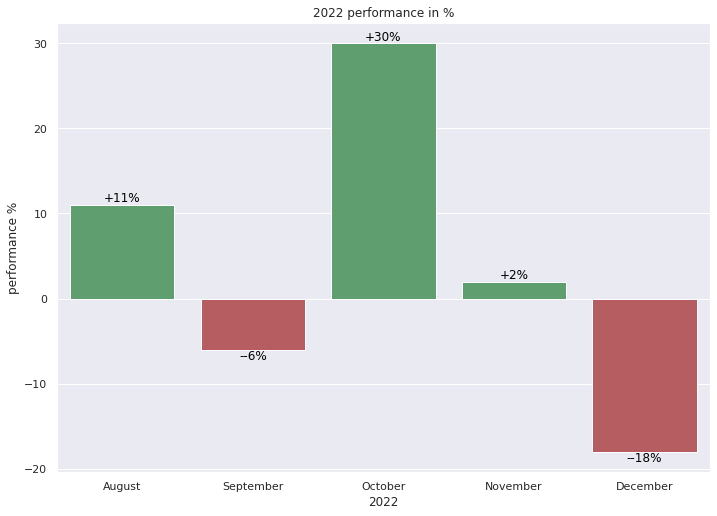

ValueError: Could not interpret input 'date'

In [13]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)

In [ ]:
BTobject.plot_wallet_evolution(dfTrades=newDf['2022'])

KeyError: '2021'

In [ ]:
dfTrades.iloc[-10:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet
474,2022-11-06 03:00:00,AVAX/USDT,Sell,Sell Market Order,19.4400,0.031352,44.757275,0.000000,88.492276
475,2022-11-06 07:00:00,SOL/USDT,Sell,Sell Market Order,36.1600,0.030033,87.631681,0.000000,87.631681
476,2022-11-06 11:00:00,BNB/USDT,Buy,Buy Market Order,351.3000,0.030671,43.800505,0.124681,87.601010
477,2022-11-06 19:00:00,MATIC/USDT,Buy,Buy Market Order,1.1915,0.030660,0.000000,36.735077,87.570350
478,2022-11-07 01:00:00,BNB/USDT,Sell,Sell Market Order,338.1000,0.029508,42.125205,0.000000,85.895050
479,2022-11-07 13:00:00,MATIC/USDT,Sell,Sell Market Order,1.1950,0.030729,85.992894,0.000000,85.992894
480,2022-11-07 16:00:00,MATIC/USDT,Buy,Buy Market Order,1.2470,0.030098,42.981398,34.467841,85.962796
481,2022-11-07 20:00:00,CHZ/USDT,Buy,Buy Market Order,0.2847,0.030087,0.000000,150.865160,85.932709
482,2022-11-08 06:00:00,CHZ/USDT,Sell,Sell Market Order,0.2486,0.026254,37.478825,0.000000,80.460223
483,2022-11-08 06:00:00,MATIC/USDT,Sell,Sell Market Order,1.1408,0.027525,76.772214,0.000000,76.772214
